#  0. 用matplotlib找系统中字体文件大于1MB的
> 中文字体通常很大，这样过滤出的 通常有中文字体

> 结果中 看名字  'AR PL UMing CN' 果然是中文字体

In [1]:
from matplotlib.font_manager import fontManager
import os
 
fonts = [font.name for font in fontManager.ttflist if 
         os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
 
for font in fonts:
    print(font)

Peddana
TenaliRamakrishna
Noto Serif CJK JP
Noto Sans CJK JP
Noto Serif Tangut
Noto Serif CJK JP
Chandas
AR PL UMing CN
Noto Serif CJK JP
Noto Sans CJK JP
Noto Sans CJK JP
Noto Sans CJK JP
Droid Sans Fallback
Noto Sans CJK JP
Noto Sans SignWriting
FreeSerif
AR PL UKai CN
Noto Serif CJK JP
Timmana
Noto Serif CJK JP
Noto Serif CJK JP
Noto Serif CJK JP
Noto Sans CJK JP
Noto Sans CJK JP
Tibetan Machine Uni


#  1. 产生tick日志

#####  编译最小main : 文件 mini_main.c
```cpp
//文件 mini_main.c
int main(int argc, char** argv){
    return 0;
}
```

```bash
tick_save=true /pubx/build-llvm15/bin/clang-15 -c mini_main.c
#生成tick日志文件:
#-rw-rw-r-- 1 zz zz 155M  8月 11 19:43 clang-15_221172_1691754235599_1

```

# 2. 加载tick日志

In [2]:
# %config InlineBackend.figure_format = 'svg'
%config InlineBackend.rc={'figure.figsize': (30,20)}

> 

In [3]:
import numpy 
import math

In [4]:
import seaborn

In [5]:
import plotly.offline as plotly_offline
plotly_offline.init_notebook_mode(connected=True)          
import plotly.graph_objs as graph_objs                
import plotly.figure_factory as figure_factory 

from plotly.graph_objs import Scatter, Figure, Scatter3d




> 解决 matplotlib 中文不正常显示问题，
>
> 中文显示为方块，原因是没有中文字体，
>
> 这里 将字体设置为 上面找到的中文字体 'AR PL UMing CN'

In [6]:
import matplotlib.pyplot
matplotlib.pyplot.rcParams['font.family'] = 'AR PL UMing CN'
matplotlib.pyplot.rcParams['font.sans-serif'] = [ 'AR PL UMing CN']

In [7]:
import pandas
# pandas.options.display.max_columns = None
# pandas.options.display.max_rows = None

In [8]:
%%bash
ls -lhrt /tick_data_home/ | tail -n 1

-rw-rw-r-- 1 zz zz 155M  8月 11 19:43 clang-15_221172_1691754235599_1


In [9]:
#编译正常: mini_main.c
df_mini_main=pandas.read_csv(filepath_or_buffer="/tick_data_home/clang-15_221172_1691754235599_1",sep=',' , quotechar="'")

df_mini_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999170 entries, 0 to 999169
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   滴答                 999170 non-null  int64 
 1   funcLocalClock     999170 non-null  int64 
 2   tickKind           999170 non-null  int64 
 3   funcEnterId        999170 non-null  int64 
 4   hasFuncCallChain   999170 non-null  int64 
 5   funcEnterIdSeqLen  999170 non-null  int64 
 6   funcEnterIdSeq     116162 non-null  object
 7   rTSVarC            999170 non-null  int64 
 8   d栈生                999170 non-null  int64 
 9   d栈死                999170 non-null  int64 
 10  d堆生                999170 non-null  int64 
 11  d堆死                999170 non-null  int64 
 12  栈生                 999170 non-null  int64 
 13  栈死                 999170 non-null  int64 
 14  栈净                 999170 non-null  int64 
 15  堆生                 999170 non-null  int64 
 16  堆死                 9

/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning:

Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.



> 文件: /pubx/clang-ctk/t_clock_tick/t_clock_tick.cpp
```cpp
/**滴答种类
 *需要被正常分析的tick是 正常tick 和 函数返回tick，
 * 正常分析不需要 函数进入tick
 * 看哪里少插入了X__funcReturn: 比对 函数进入tick    和  函数返回tick 是否配对
 */
enum TickKind{
    //正常tick
    NormalTick=0,
    //函数进入tick 可作为 和 函数返回tick 做比对，看哪里少插入了X__funcReturn
    FuncEnter=1,
    //函数返回tick
    FuncReturn=2

};
```

In [10]:
NormalTick=0
#函数进入
FuncEnter=1
#函数返回tick
FuncReturn=2
    
#TOdo 只保留 进入和返回

dfmm=df_mini_main[  df_mini_main['tickKind'].isin( [FuncEnter,FuncReturn] )  ]

dfmm链=df_mini_main[  df_mini_main['tickKind'].isin( [FuncEnter] )  ]

In [11]:
dfmm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232342 entries, 0 to 999168
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   滴答                 232342 non-null  int64 
 1   funcLocalClock     232342 non-null  int64 
 2   tickKind           232342 non-null  int64 
 3   funcEnterId        232342 non-null  int64 
 4   hasFuncCallChain   232342 non-null  int64 
 5   funcEnterIdSeqLen  232342 non-null  int64 
 6   funcEnterIdSeq     116162 non-null  object
 7   rTSVarC            232342 non-null  int64 
 8   d栈生                232342 non-null  int64 
 9   d栈死                232342 non-null  int64 
 10  d堆生                232342 non-null  int64 
 11  d堆死                232342 non-null  int64 
 12  栈生                 232342 non-null  int64 
 13  栈死                 232342 non-null  int64 
 14  栈净                 232342 non-null  int64 
 15  堆生                 232342 non-null  int64 
 16  堆死                 2

In [12]:
dfmm链.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116162 entries, 0 to 999163
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   滴答                 116162 non-null  int64 
 1   funcLocalClock     116162 non-null  int64 
 2   tickKind           116162 non-null  int64 
 3   funcEnterId        116162 non-null  int64 
 4   hasFuncCallChain   116162 non-null  int64 
 5   funcEnterIdSeqLen  116162 non-null  int64 
 6   funcEnterIdSeq     116162 non-null  object
 7   rTSVarC            116162 non-null  int64 
 8   d栈生                116162 non-null  int64 
 9   d栈死                116162 non-null  int64 
 10  d堆生                116162 non-null  int64 
 11  d堆死                116162 non-null  int64 
 12  栈生                 116162 non-null  int64 
 13  栈死                 116162 non-null  int64 
 14  栈净                 116162 non-null  int64 
 15  堆生                 116162 non-null  int64 
 16  堆死                 1

In [13]:
dfmm.head(5)

,滴答,funcLocalClock,tickKind,funcEnterId,hasFuncCallChain,funcEnterIdSeqLen,funcEnterIdSeq,rTSVarC,d栈生,d栈死,...,栈生,栈死,栈净,堆生,堆死,堆净,srcFile,funcLine,funcCol,funcName
0,1,1,1,0,1,1,0#'',0,0,0,...,0,0,0,0,0,0,/pubx/llvm-project/llvm/lib/Support/CommandLin...,42,42,llvm::cl::getGeneralCategory
2,3,1,1,1,1,2,-1616939133#1#'',0,0,0,...,1,0,1,0,0,0,/pubx/llvm-project/llvm/lib/Support/CommandLin...,41,41,llvm::cl::OptionCategory::registerCategory
4,5,1,1,2,1,3,-1616939133#2#1#'',0,0,0,...,1,0,1,0,0,0,/pubx/llvm-project/llvm/lib/Support/ManagedSta...,77,77,llvm::ManagedStaticBase::RegisterManagedStatic
6,7,1,1,3,1,4,-1616939133#3#2#1#'',0,0,0,...,1,0,1,0,0,0,/pubx/llvm-project/llvm/lib/Support/Threading.cpp,36,36,llvm::llvm_is_multithreaded
7,8,2,2,3,0,0,NaN,0,0,0,...,1,0,1,0,0,0,/pubx/llvm-project/llvm/lib/Support/Threading.cpp,36,36,llvm::llvm_is_multithreaded


In [14]:
dfmm链.head(5)
#多出的复数 -1616939133  应该是循环边界问题，不影响链长使用

,滴答,funcLocalClock,tickKind,funcEnterId,hasFuncCallChain,funcEnterIdSeqLen,funcEnterIdSeq,rTSVarC,d栈生,d栈死,...,栈生,栈死,栈净,堆生,堆死,堆净,srcFile,funcLine,funcCol,funcName
0,1,1,1,0,1,1,0#'',0,0,0,...,0,0,0,0,0,0,/pubx/llvm-project/llvm/lib/Support/CommandLin...,42,42,llvm::cl::getGeneralCategory
2,3,1,1,1,1,2,-1616939133#1#'',0,0,0,...,1,0,1,0,0,0,/pubx/llvm-project/llvm/lib/Support/CommandLin...,41,41,llvm::cl::OptionCategory::registerCategory
4,5,1,1,2,1,3,-1616939133#2#1#'',0,0,0,...,1,0,1,0,0,0,/pubx/llvm-project/llvm/lib/Support/ManagedSta...,77,77,llvm::ManagedStaticBase::RegisterManagedStatic
6,7,1,1,3,1,4,-1616939133#3#2#1#'',0,0,0,...,1,0,1,0,0,0,/pubx/llvm-project/llvm/lib/Support/Threading.cpp,36,36,llvm::llvm_is_multithreaded
9,10,1,1,4,1,4,-1616939133#4#2#1#'',0,0,0,...,2,0,2,0,0,0,/pubx/llvm-project/llvm/lib/Support/ManagedSta...,54,54,getManagedStaticMutex


In [15]:
dfmm.shape,  dfmm链.shape

((232342, 22), (116162, 22))

# 3. funcId 构造

In [16]:
dfmm.head(1)

,滴答,funcLocalClock,tickKind,funcEnterId,hasFuncCallChain,funcEnterIdSeqLen,funcEnterIdSeq,rTSVarC,d栈生,d栈死,...,栈生,栈死,栈净,堆生,堆死,堆净,srcFile,funcLine,funcCol,funcName
0,1,1,1,0,1,1,0#'',0,0,0,...,0,0,0,0,0,0,/pubx/llvm-project/llvm/lib/Support/CommandLin...,42,42,llvm::cl::getGeneralCategory


####  3.1 新增列 funcLoc  相当于字符串样式的funId

In [17]:
#新增列 funcLoc 
dfmm['funcLoc']=dfmm .apply(lambda r: f'{r.srcFile}_{r.funcLine}_{r.funcCol}', axis=1 )
dfmm['funcLoc'].values[:4]

array(['/pubx/llvm-project/llvm/lib/Support/CommandLine.cpp_42_42',
       '/pubx/llvm-project/llvm/lib/Support/CommandLine.cpp_41_41',
       '/pubx/llvm-project/llvm/lib/Support/ManagedStatic.cpp_77_77',
       '/pubx/llvm-project/llvm/lib/Support/Threading.cpp_36_36'],
      dtype=object)

####  3.2  以 区间[0, funcLoc不重复个数-1] 作为 funcId表

In [18]:

funcLoc_values=dfmm['funcLoc'].values
type(funcLoc_values)#numpy.ndarray
len(funcLoc_values)#1014494

funcLoc_list=list(funcLoc_values)
len(funcLoc_list)#1014494

#funcLoc转为集合
funcLoc_set=set(funcLoc_values)
len(funcLoc_set)#2838

#funcLoc集合作为列表: 即 不重复的funcLoc 列表
uqFuncLoc_Ls=list(funcLoc_set)
len(uqFuncLoc_Ls)#2838
#uq:unique

#不重复的funcLoc 列表 转为 funcId表
funcId_Tab=dict( [(fL,j) for j,fL in enumerate(uqFuncLoc_Ls)] )
list(funcId_Tab.items())[:5]

[('/pubx/llvm-project/llvm/lib/CodeGen/AsmPrinter/AsmPrinter.cpp_38_38', 0),
 ('/pubx/llvm-project/llvm/lib/CodeGen/StackProtector.cpp_68_68', 1),
 ('/pubx/llvm-project/llvm/lib/Target/X86/MCTargetDesc/X86MCCodeEmitter.cpp_64_64',
  2),
 ('/pubx/llvm-project/clang/lib/Sema/SemaStmt.cpp_45_45', 3),
 ('/pubx/llvm-project/clang/lib/Sema/SemaInit.cpp_61_61', 4)]

In [19]:
print("funcId个数:",len(funcId_Tab))

funcId个数: 2210


####  3.3  参照 funLoc列、funcId表 新增列funcId

In [20]:
#新增列 funcId 
dfmm['funcId']=dfmm['funcLoc'] .apply(lambda fLocJ:  funcId_Tab[fLocJ] )
dfmm['funcId'].values[:10]
dfmm.head(2)

,滴答,funcLocalClock,tickKind,funcEnterId,hasFuncCallChain,funcEnterIdSeqLen,funcEnterIdSeq,rTSVarC,d栈生,d栈死,...,栈净,堆生,堆死,堆净,srcFile,funcLine,funcCol,funcName,funcLoc,funcId
0,1,1,1,0,1,1,0#'',0,0,0,...,0,0,0,0,/pubx/llvm-project/llvm/lib/Support/CommandLin...,42,42,llvm::cl::getGeneralCategory,/pubx/llvm-project/llvm/lib/Support/CommandLin...,672
2,3,1,1,1,1,2,-1616939133#1#'',0,0,0,...,1,0,0,0,/pubx/llvm-project/llvm/lib/Support/CommandLin...,41,41,llvm::cl::OptionCategory::registerCategory,/pubx/llvm-project/llvm/lib/Support/CommandLin...,1362


####  3.x  开发用代码

In [21]:
#

# 4 作图

In [22]:
#增大图例颜色圆球的尺寸
def inrease_g_size(g):
    for lh in g.legend_.legendHandles: 
        lh.set_alpha(1)
        lh._sizes = [500] 

In [23]:
import warnings
# 过滤掉RuntimeWarning警告
warnings.filterwarnings("ignore", category=RuntimeWarning)

###  栈生、栈净、栈死

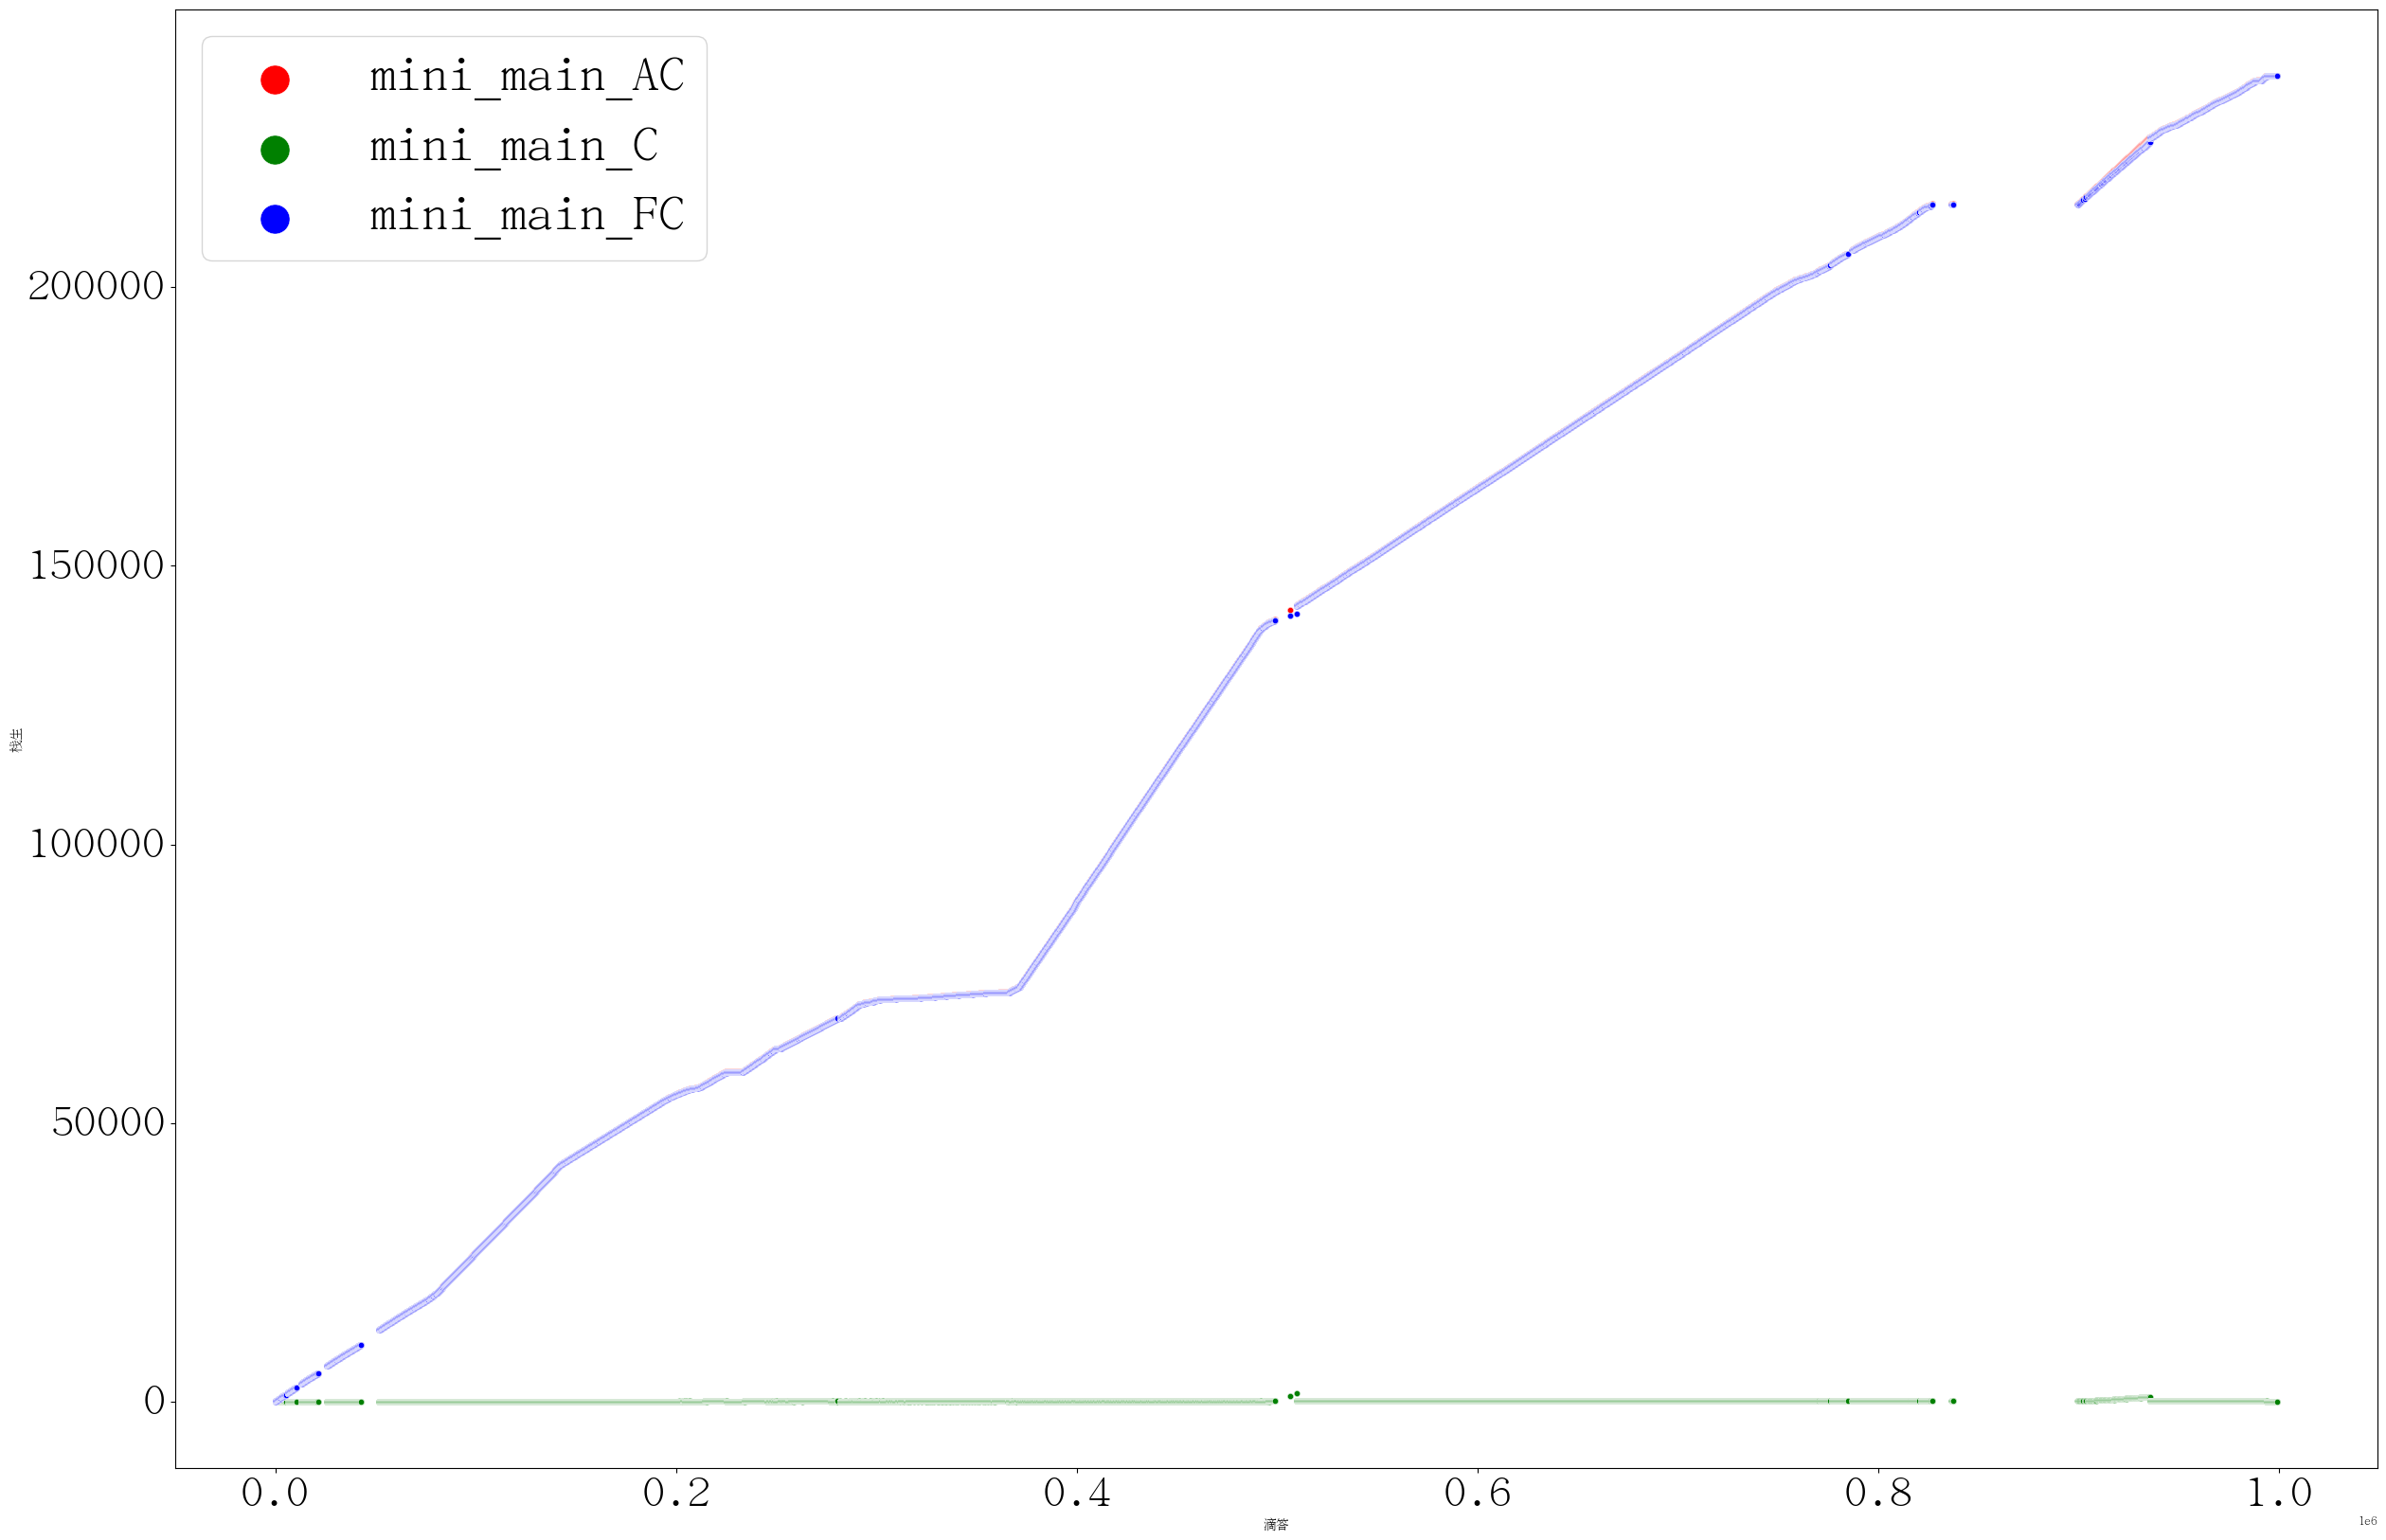

In [24]:

fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈生' , data=dfmm, alpha=0.9, s=20, label='mini_main_AC',color='red',ax=ax)  
g2=seaborn.scatterplot(x='滴答', y='栈净' , data=dfmm, alpha=0.9, s=20, label='mini_main_C',color='green',ax=ax)   
g3=seaborn.scatterplot(x='滴答', y='栈死' , data=dfmm, alpha=0.9, s=20, label='mini_main_FC',color='blue',ax=ax)   

inrease_g_size(g1)
inrease_g_size(g2)
inrease_g_size(g3)

###  栈净、链长

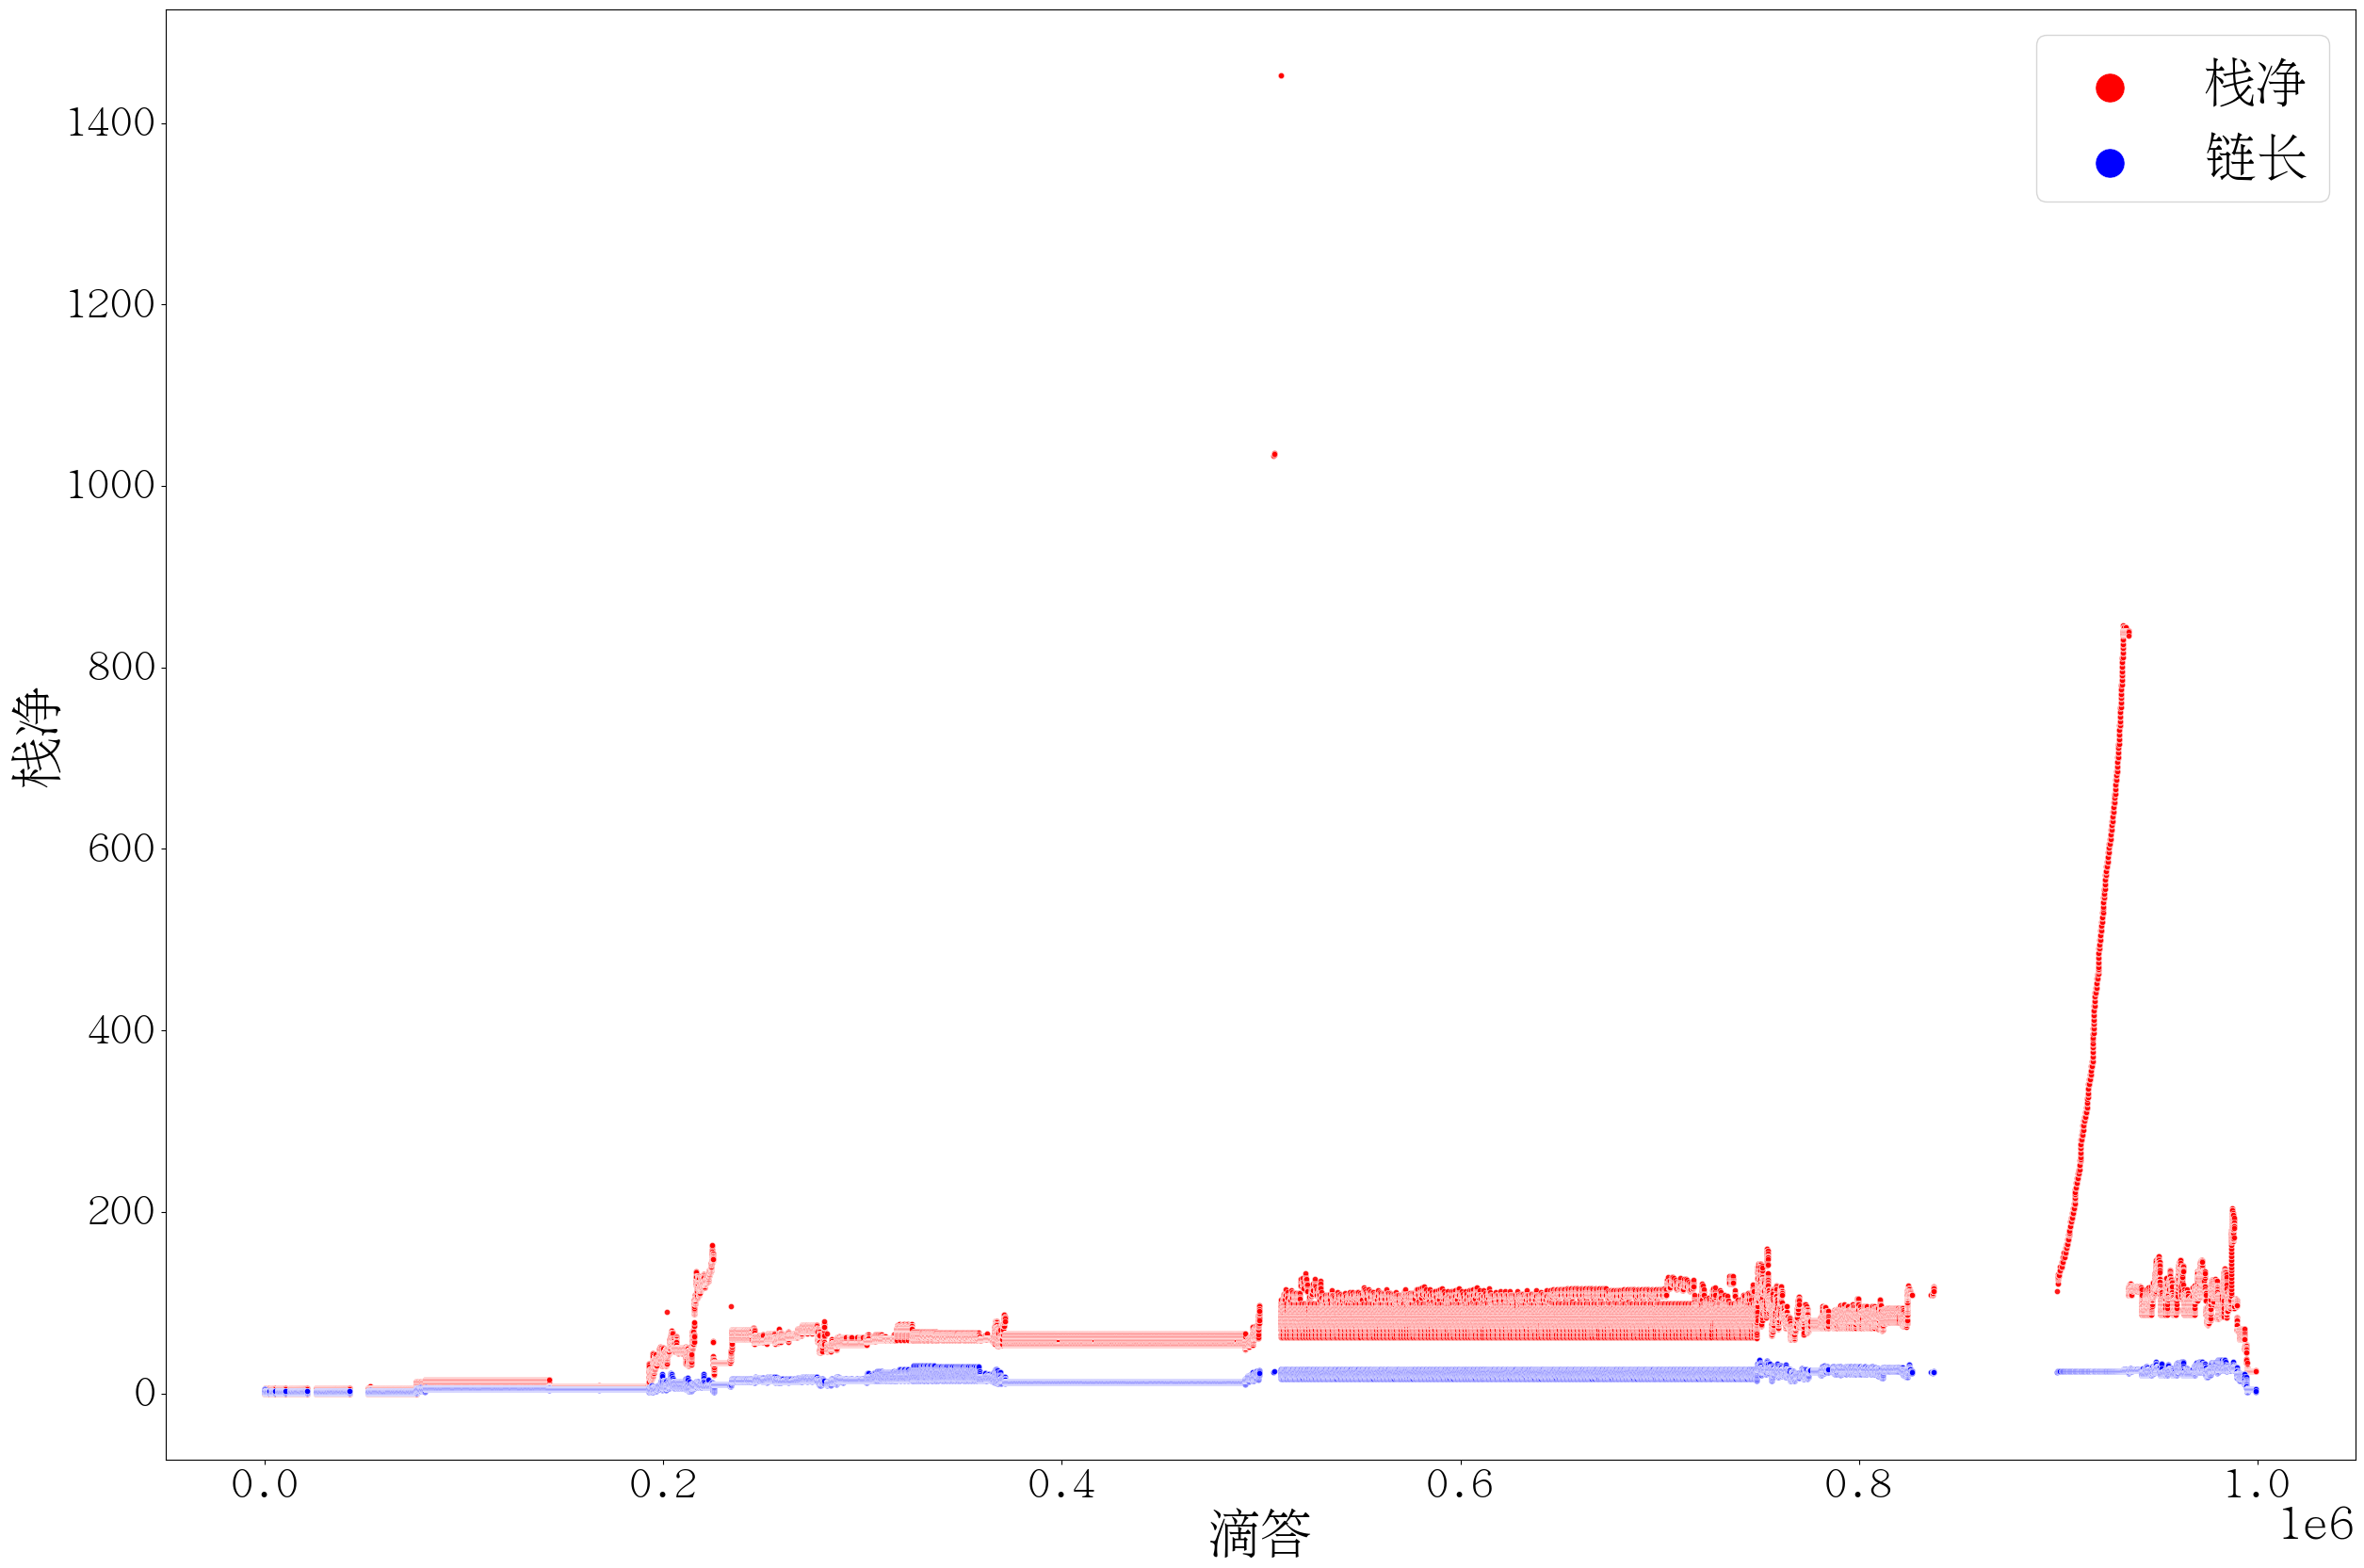

In [25]:
fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈净' , data=dfmm, alpha=0.9, s=20, label='栈净',color='red',ax=ax)  
g1=seaborn.scatterplot(x='滴答', y='funcEnterIdSeqLen' , data=dfmm链, alpha=0.9, s=20, label='链长',color='blue',ax=ax)  

inrease_g_size(g1)

###  栈净对数、链长

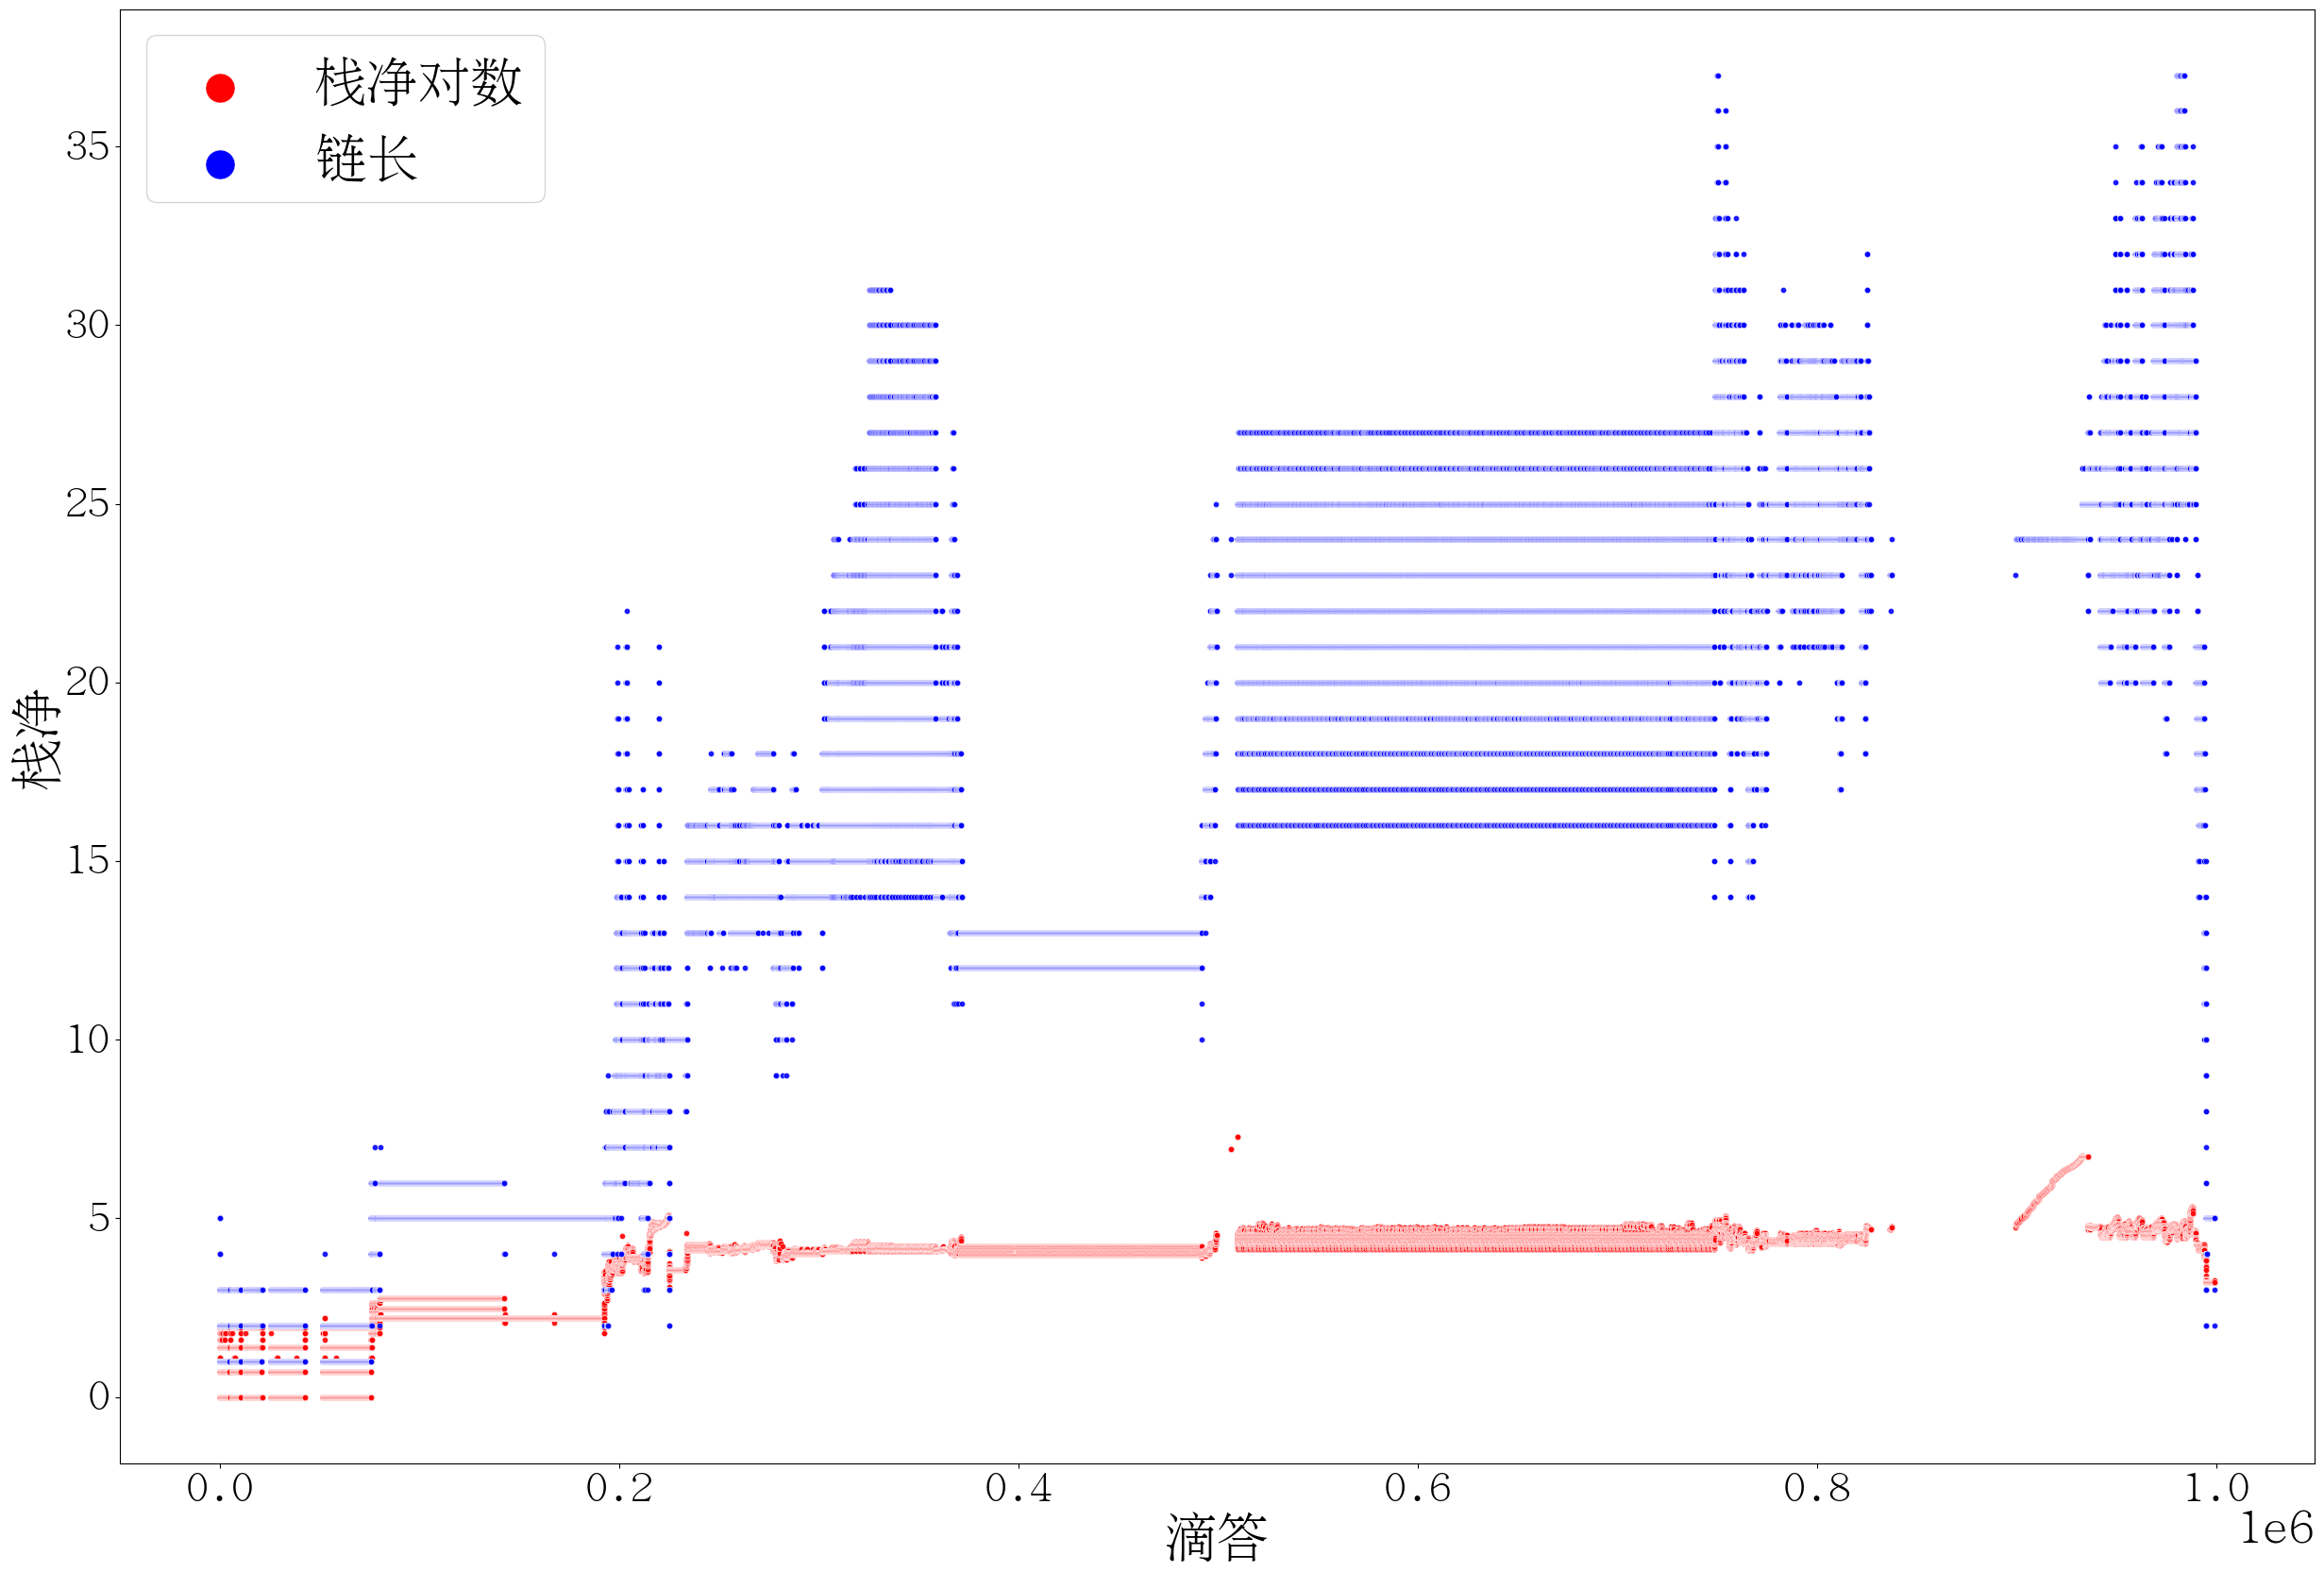

In [26]:
fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y=numpy.log(dfmm['栈净']+1) , data=dfmm, alpha=0.9, s=20, label='栈净对数',color='red',ax=ax)  
g1=seaborn.scatterplot(x='滴答', y='funcEnterIdSeqLen' , data=dfmm链, alpha=0.9, s=20, label='链长',color='blue',ax=ax)  

inrease_g_size(g1)

###  栈净

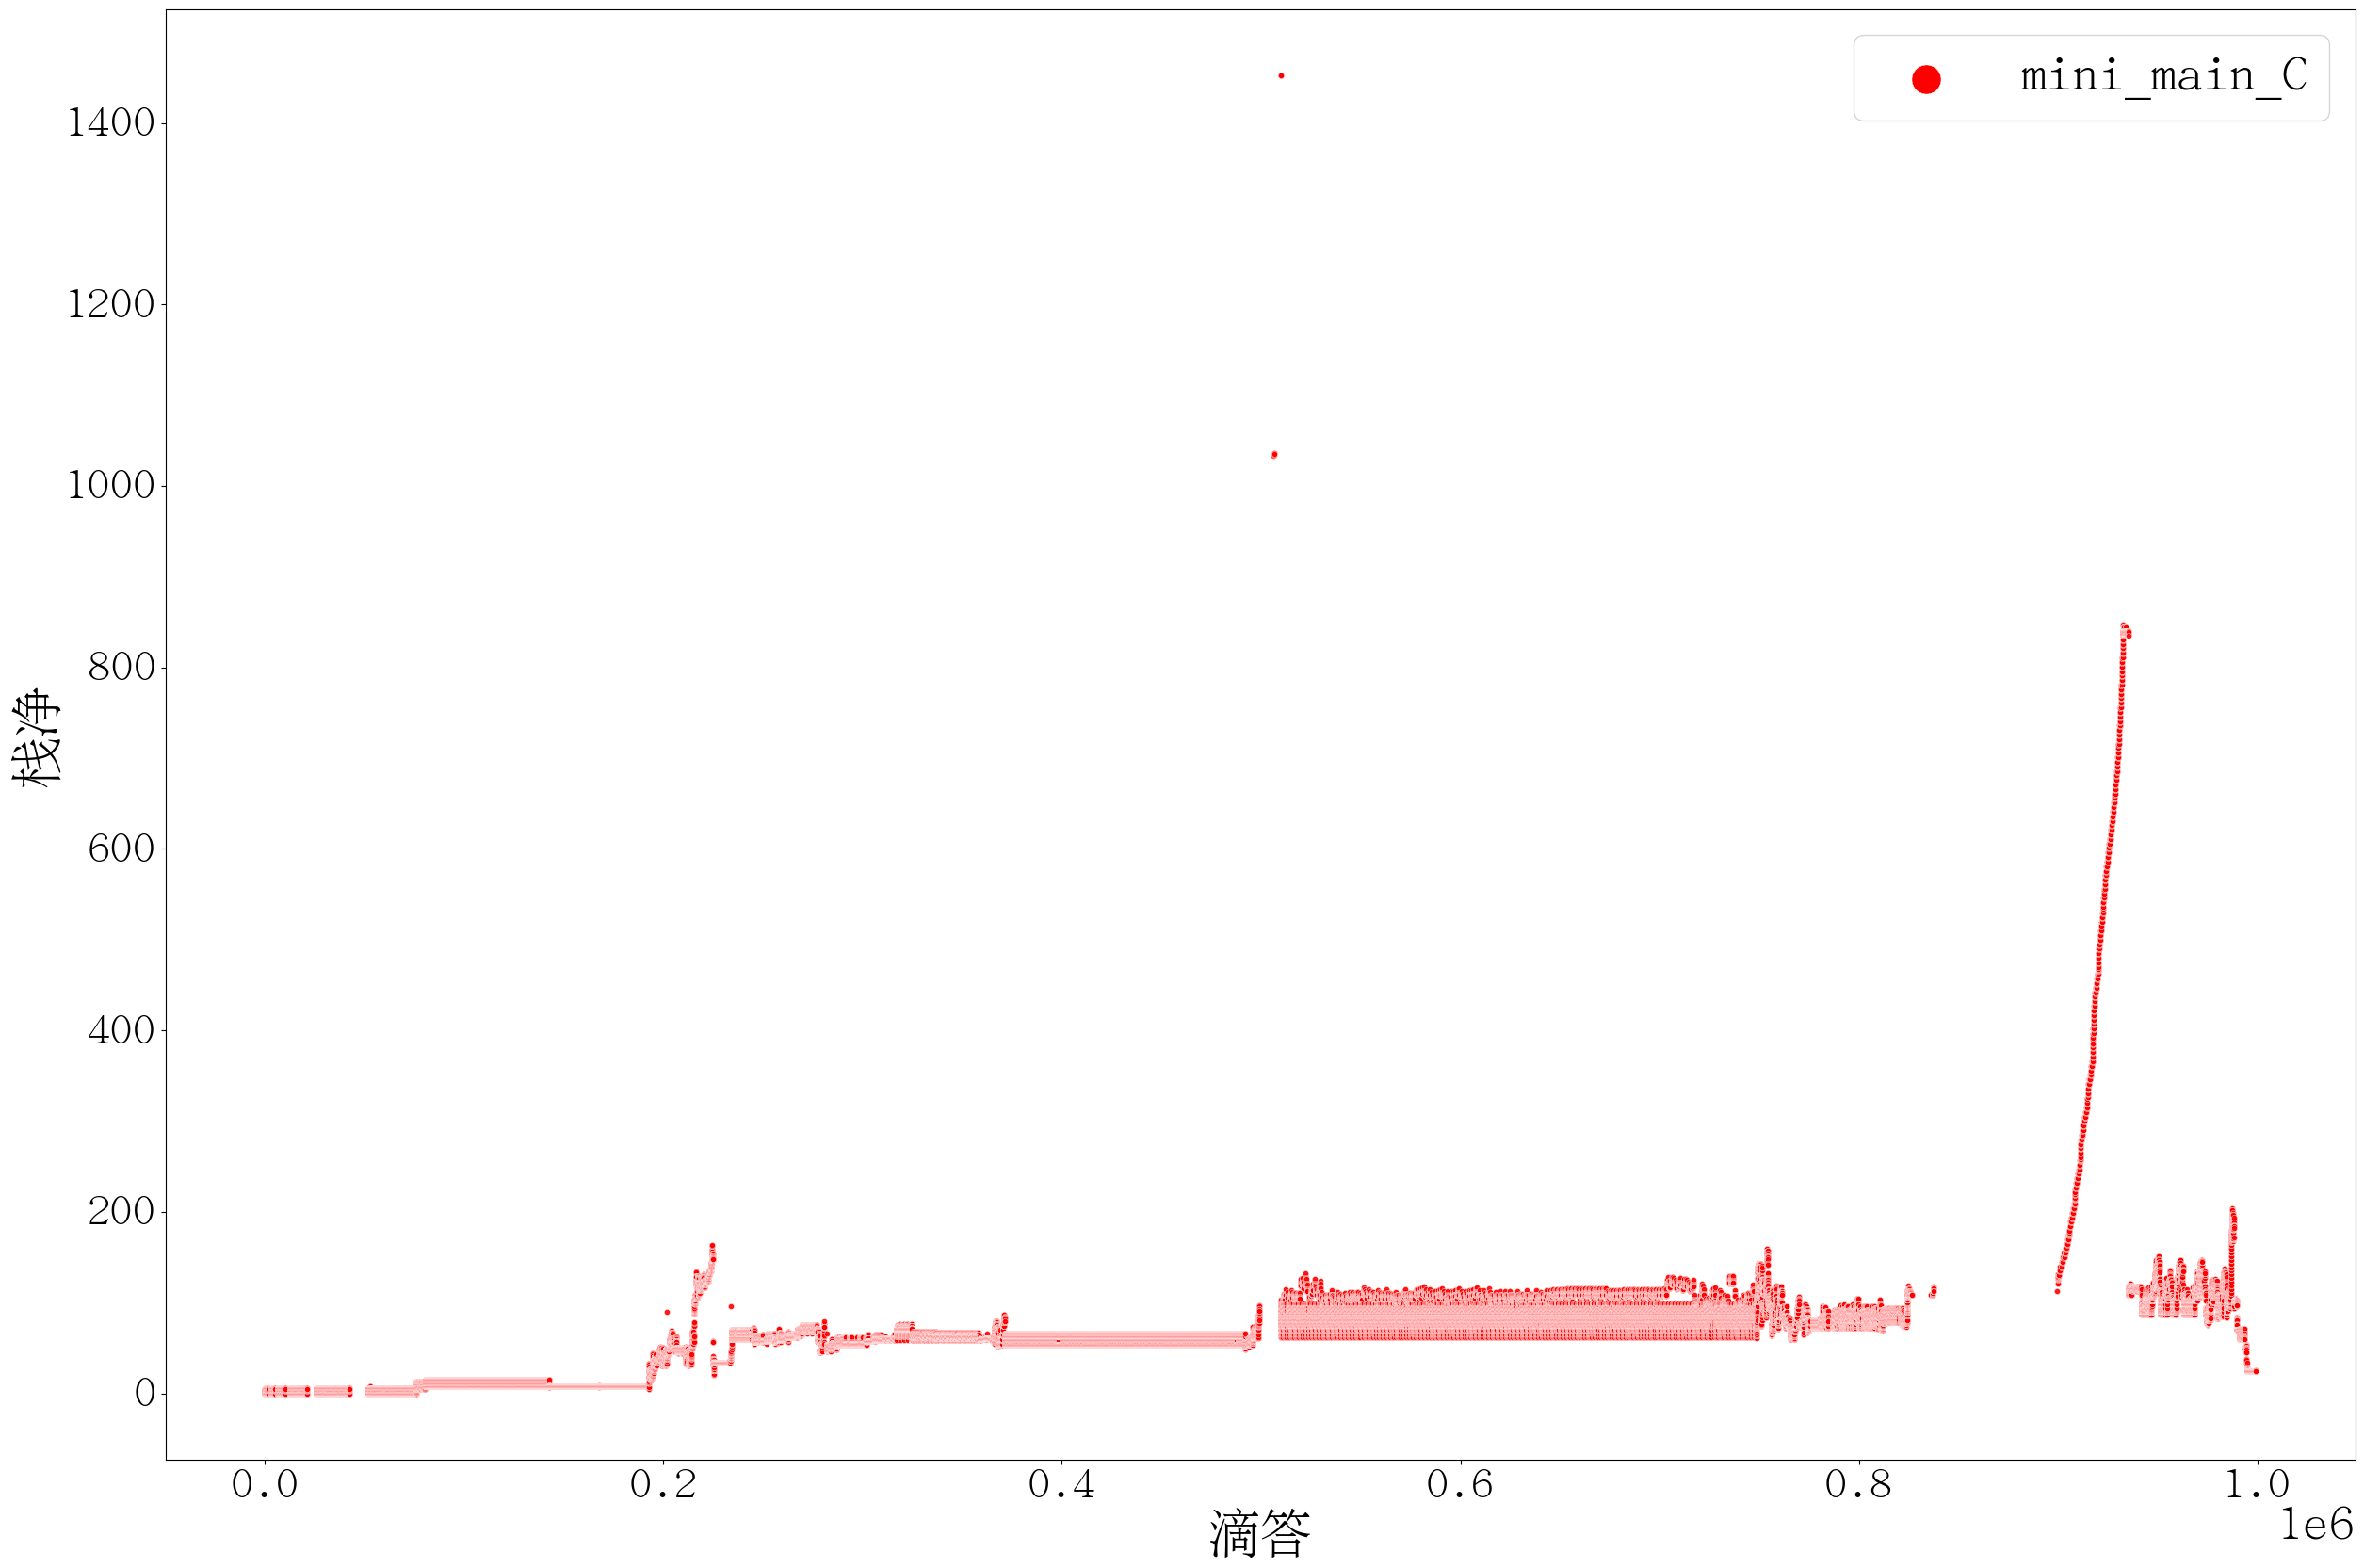

In [27]:
fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈净' , data=dfmm, alpha=0.9, s=20, label='mini_main_C',color='red',ax=ax)  

inrease_g_size(g1)

###  链长

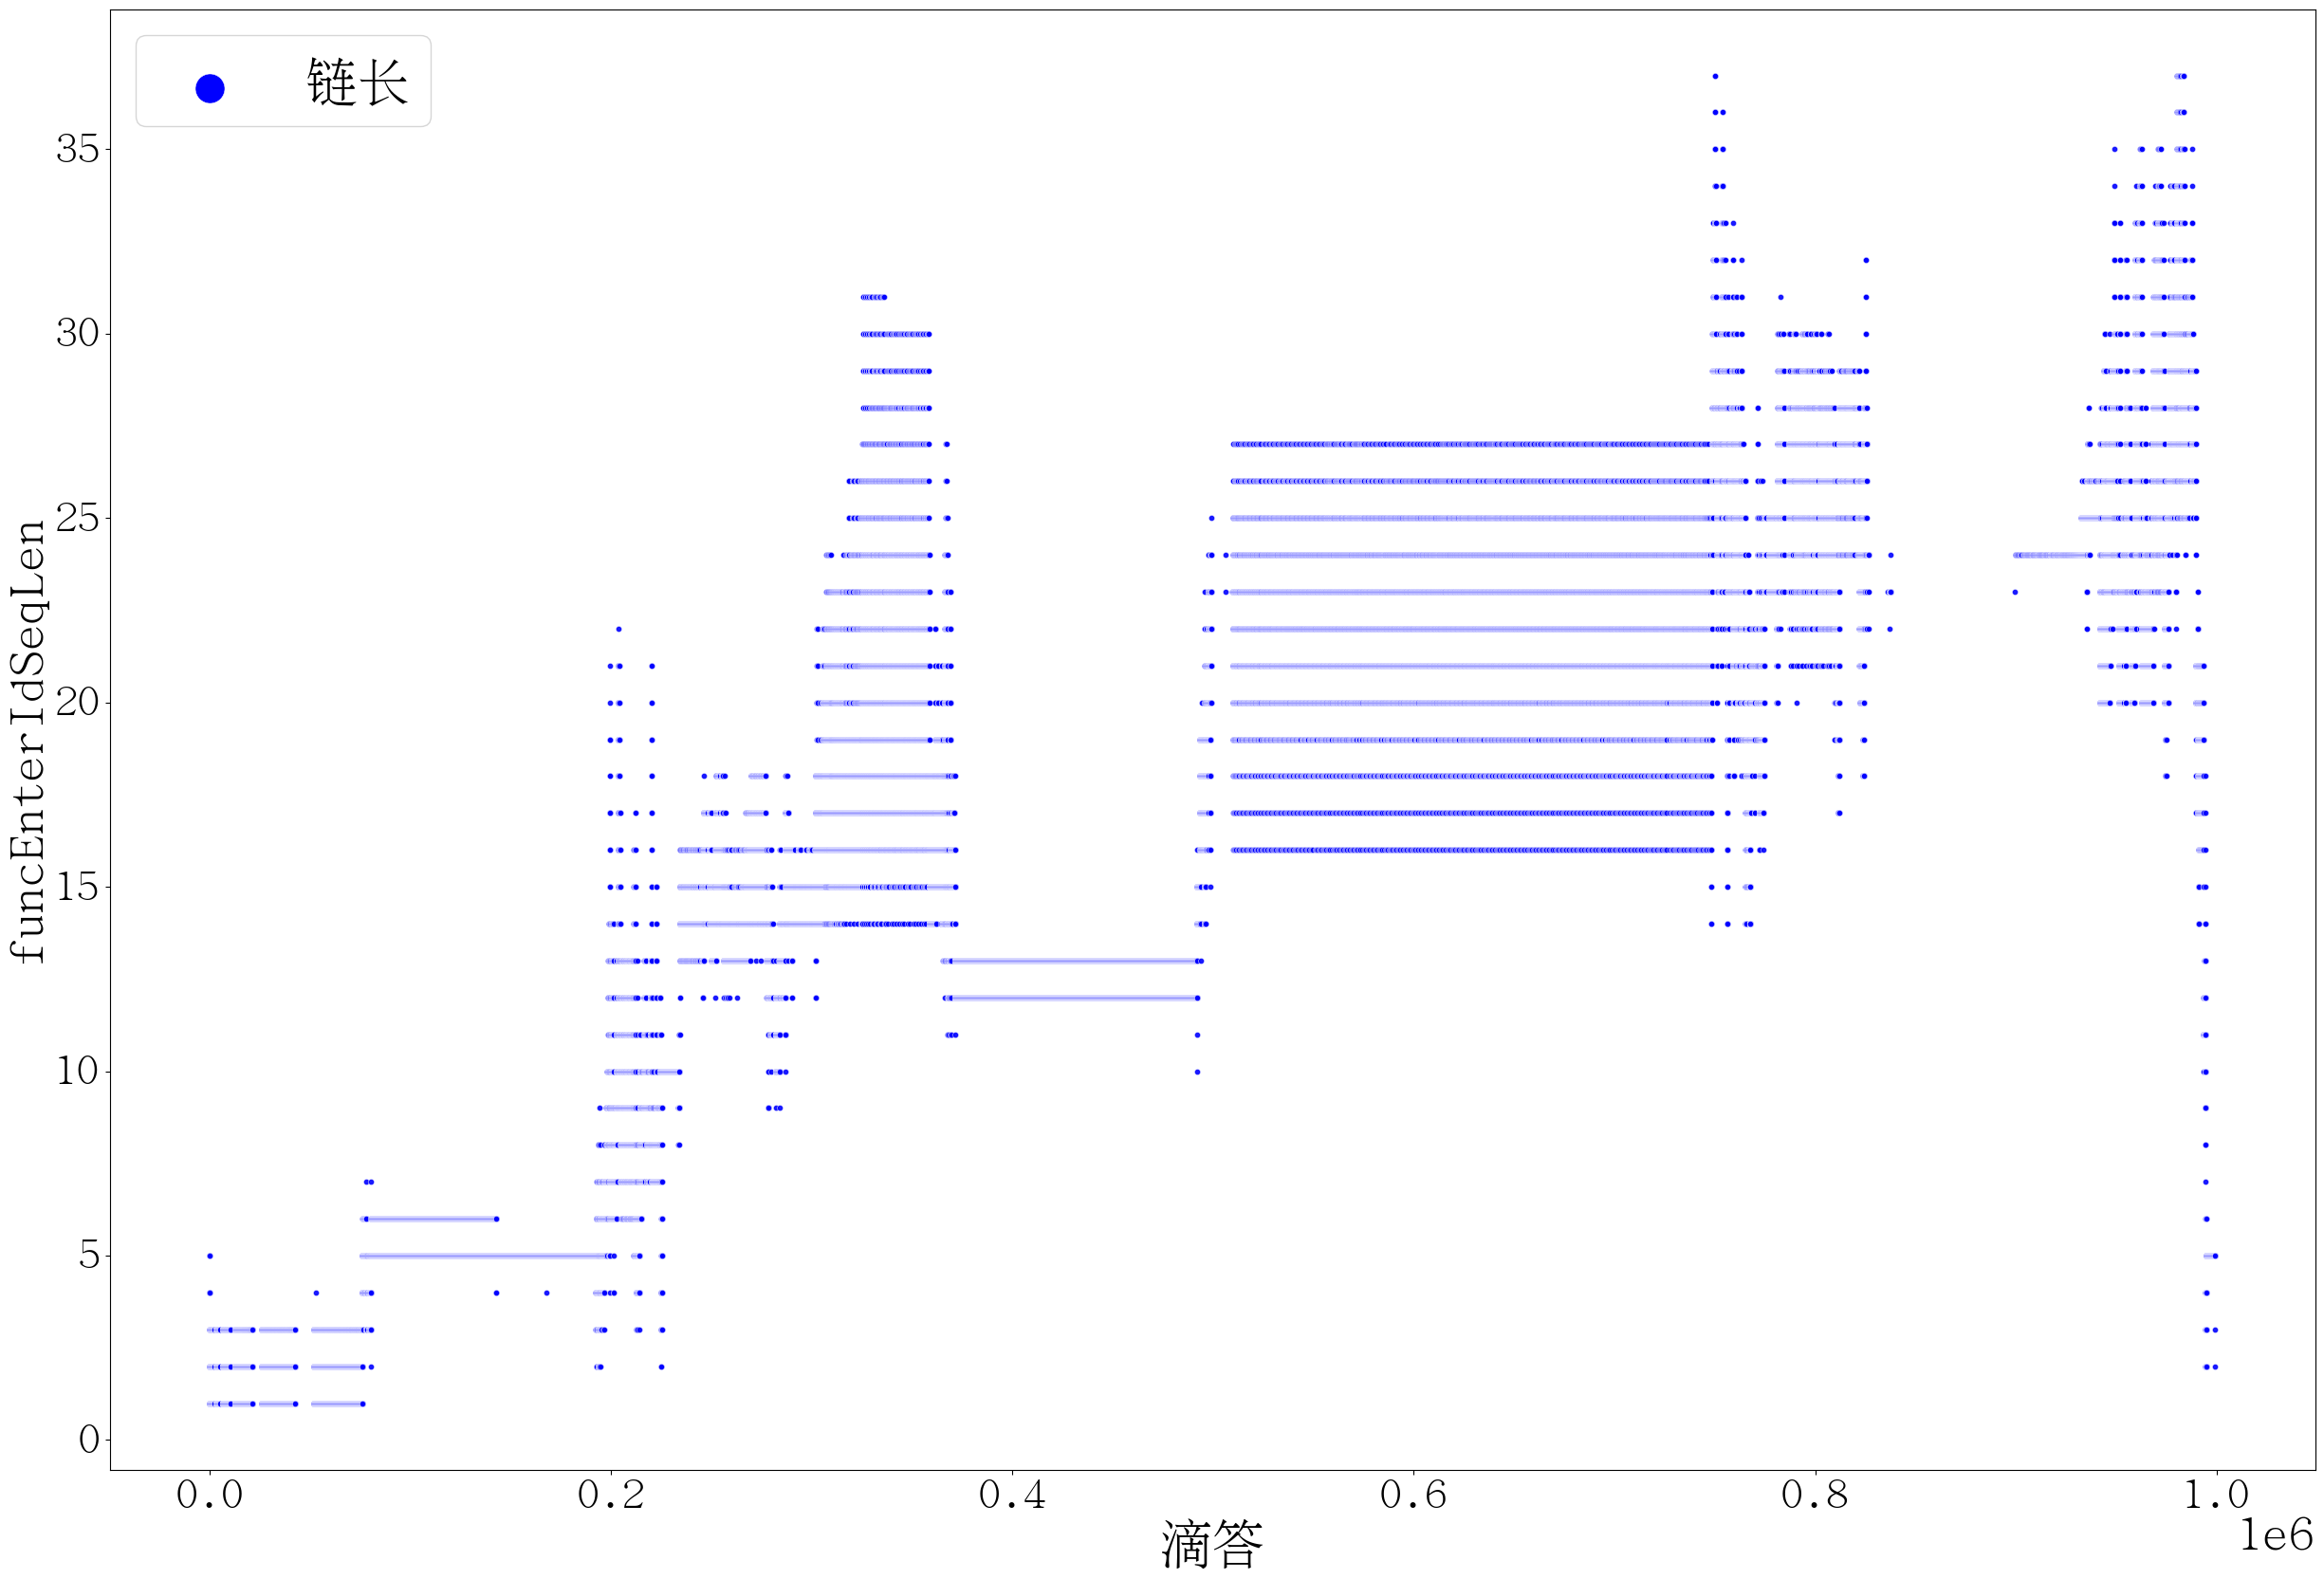

In [28]:
fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='funcEnterIdSeqLen' , data=dfmm链, alpha=0.9, s=20, label='链长',color='blue',ax=ax)  

inrease_g_size(g1)